In [6]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [8]:
# carregar arquivo de dados de treino
data = pd.read_csv('abalone-train.csv', index_col='id')

# mostrar alguns exemplos de registros
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
id,,,,,,,,,
2758,M,0.535,0.430,0.155,0.7845,0.3285,0.1690,0.2450,10
1384,F,0.630,0.485,0.170,1.3205,0.5945,0.3450,0.3450,9
1131,M,0.565,0.435,0.150,0.9900,0.5795,0.1825,0.2060,8
3726,I,0.500,0.395,0.145,0.7865,0.3320,0.1815,0.2455,8
3445,I,0.495,0.400,0.145,0.5780,0.2545,0.1305,0.1645,8


In [9]:
# quantos moluscos existem de cada idade?
data['rings'].value_counts(sorted

9     441
10    424
8     392
11    345
7     257
6     171
12    168
13    136
5      80
14     72
15     70
16     45
17     45
4      35
18     28
19     20
20     15
3      12
21     12
23      6
22      4
24      1
26      1
1       1
27      1
25      1
29      1
Name: rings, dtype: int64

In [10]:
data.iloc[:,:-1].head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
id,,,,,,,,
2758,M,0.535,0.430,0.155,0.7845,0.3285,0.1690,0.2450
1384,F,0.630,0.485,0.170,1.3205,0.5945,0.3450,0.3450
1131,M,0.565,0.435,0.150,0.9900,0.5795,0.1825,0.2060
3726,I,0.500,0.395,0.145,0.7865,0.3320,0.1815,0.2455
3445,I,0.495,0.400,0.145,0.5780,0.2545,0.1305,0.1645


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


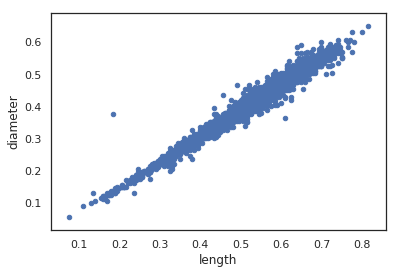

In [11]:
# gerar gráfico de dispersão simples
data.plot(kind="scatter", x="length", y="diameter")

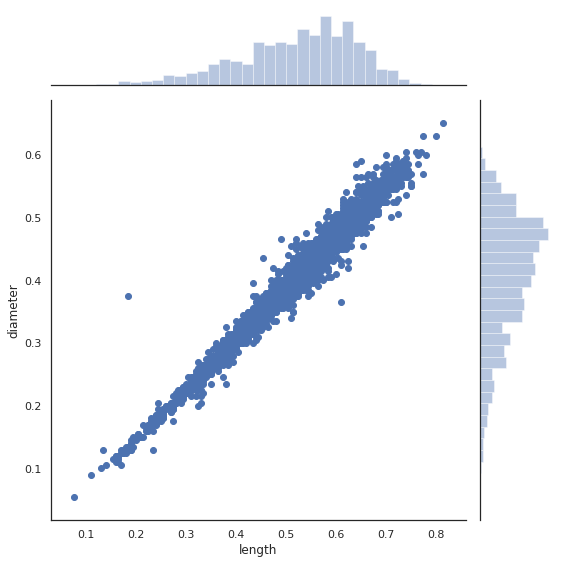

In [28]:
# gerar gráfico de dispersão com histograma usando o pacote seaborn
sns.jointplot(x="length", y="diameter", data=data, size=8)

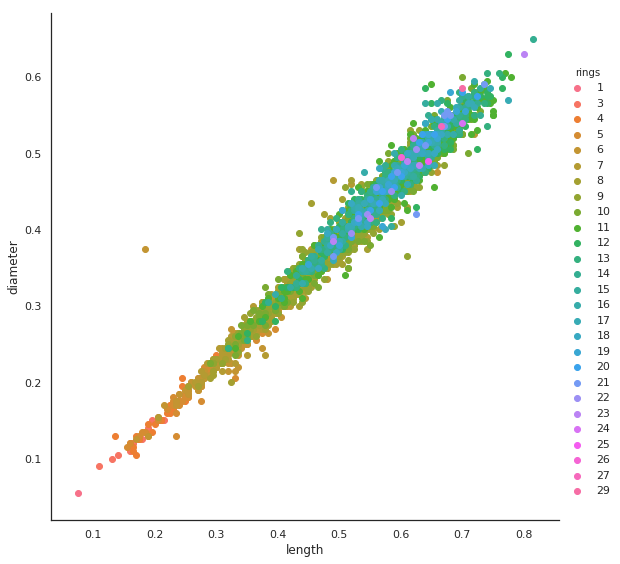

In [29]:
# gerar gráfico similar usando a espécie na cor
sns.FacetGrid(data, hue="rings", size=8) \
   .map(plt.scatter, "length", "diameter") \
   .add_legend()

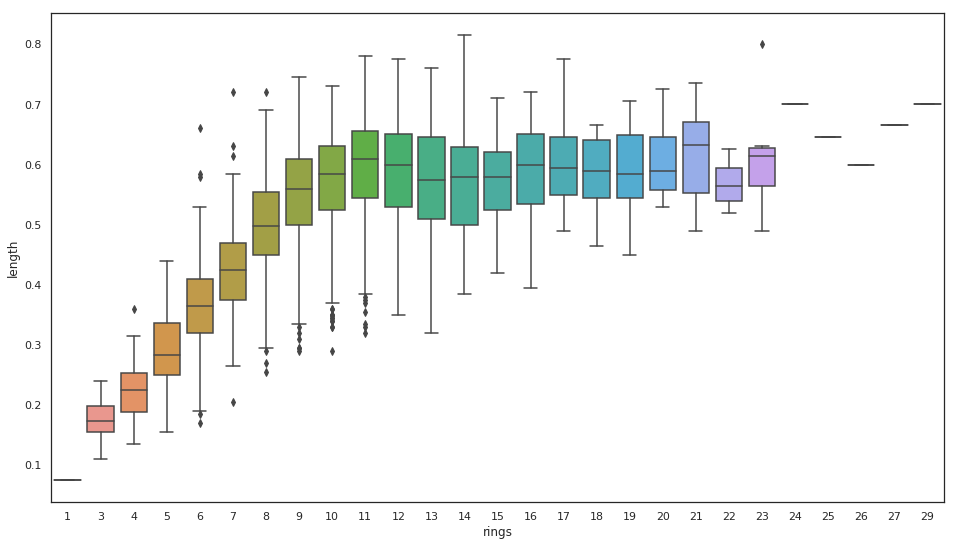

In [17]:
# gerar um gráfico do tipo boxplot sobre uma característica individual
plt.figure(figsize=(16, 9))
sns.boxplot(x="rings", y="length", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa3bb1e0c>,
      dtype=object)

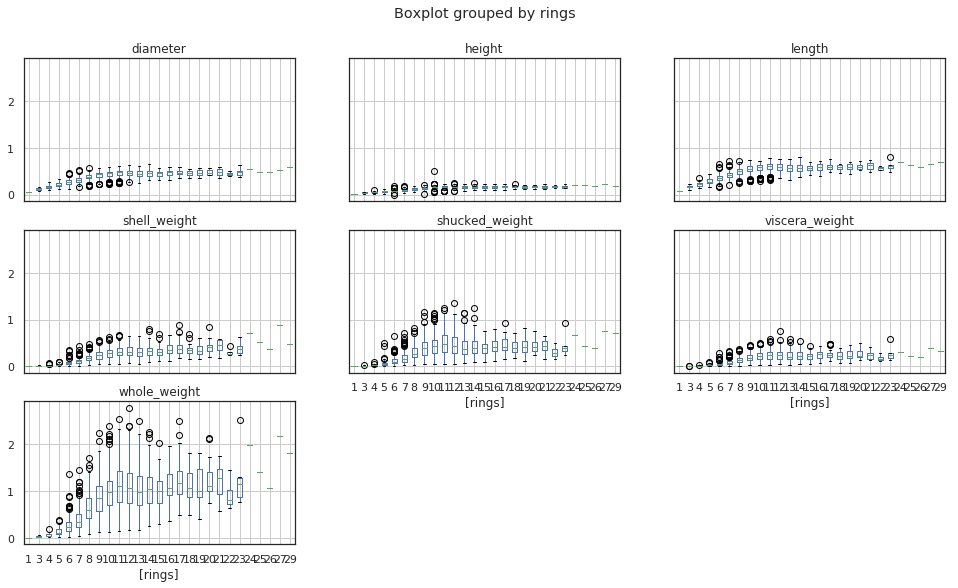

In [18]:
# gerar boxplot para cada uma das características por espécie
data.boxplot(by="rings", figsize=(16, 9))

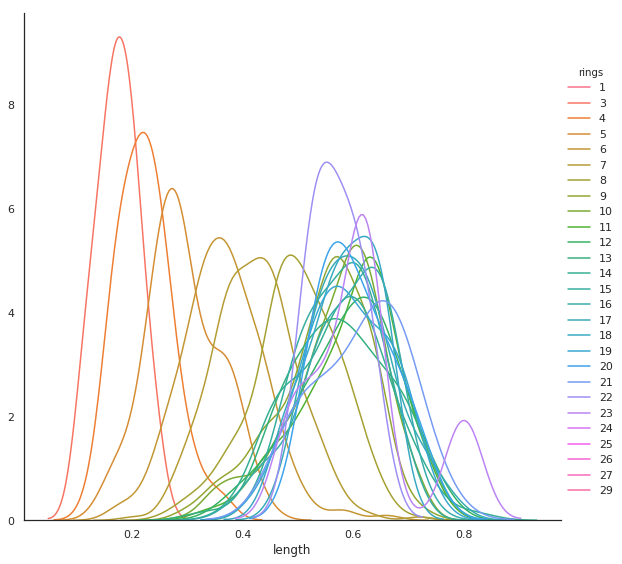

In [20]:
# gerar gráfico kde (densidade de kernel) sobre uma característica
sns.FacetGrid(data, hue="rings", size=8) \
   .map(sns.kdeplot, "length") \
   .add_legend()

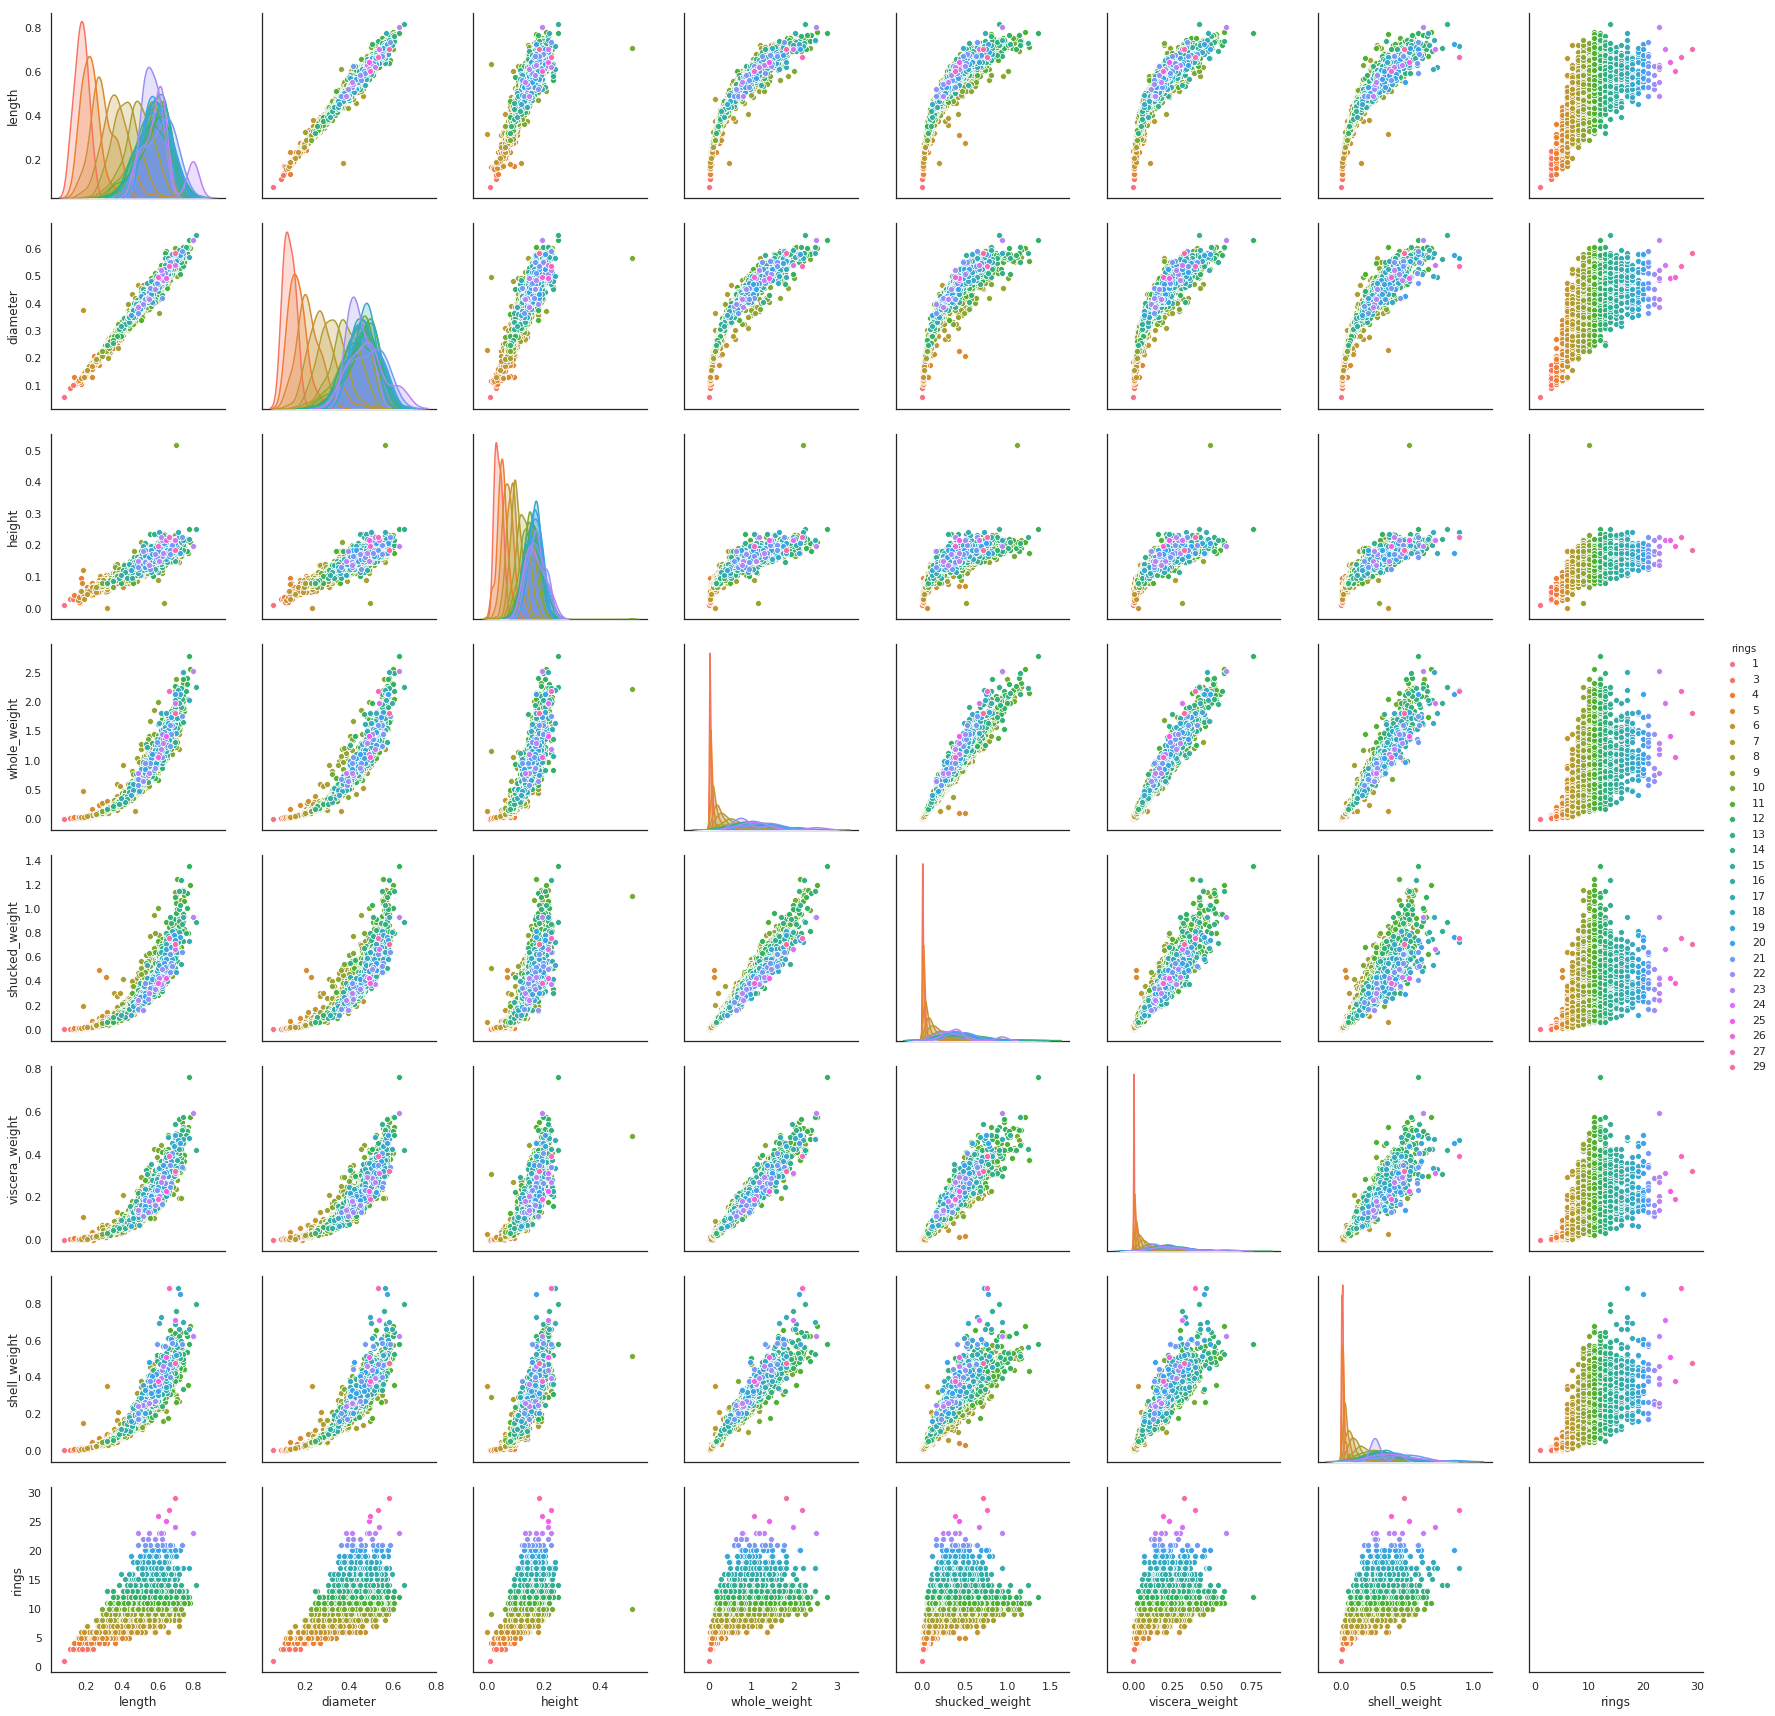

In [12]:
# gerar gráfico para analisar pares de características
sns.pairplot(data, hue="rings", size=3)

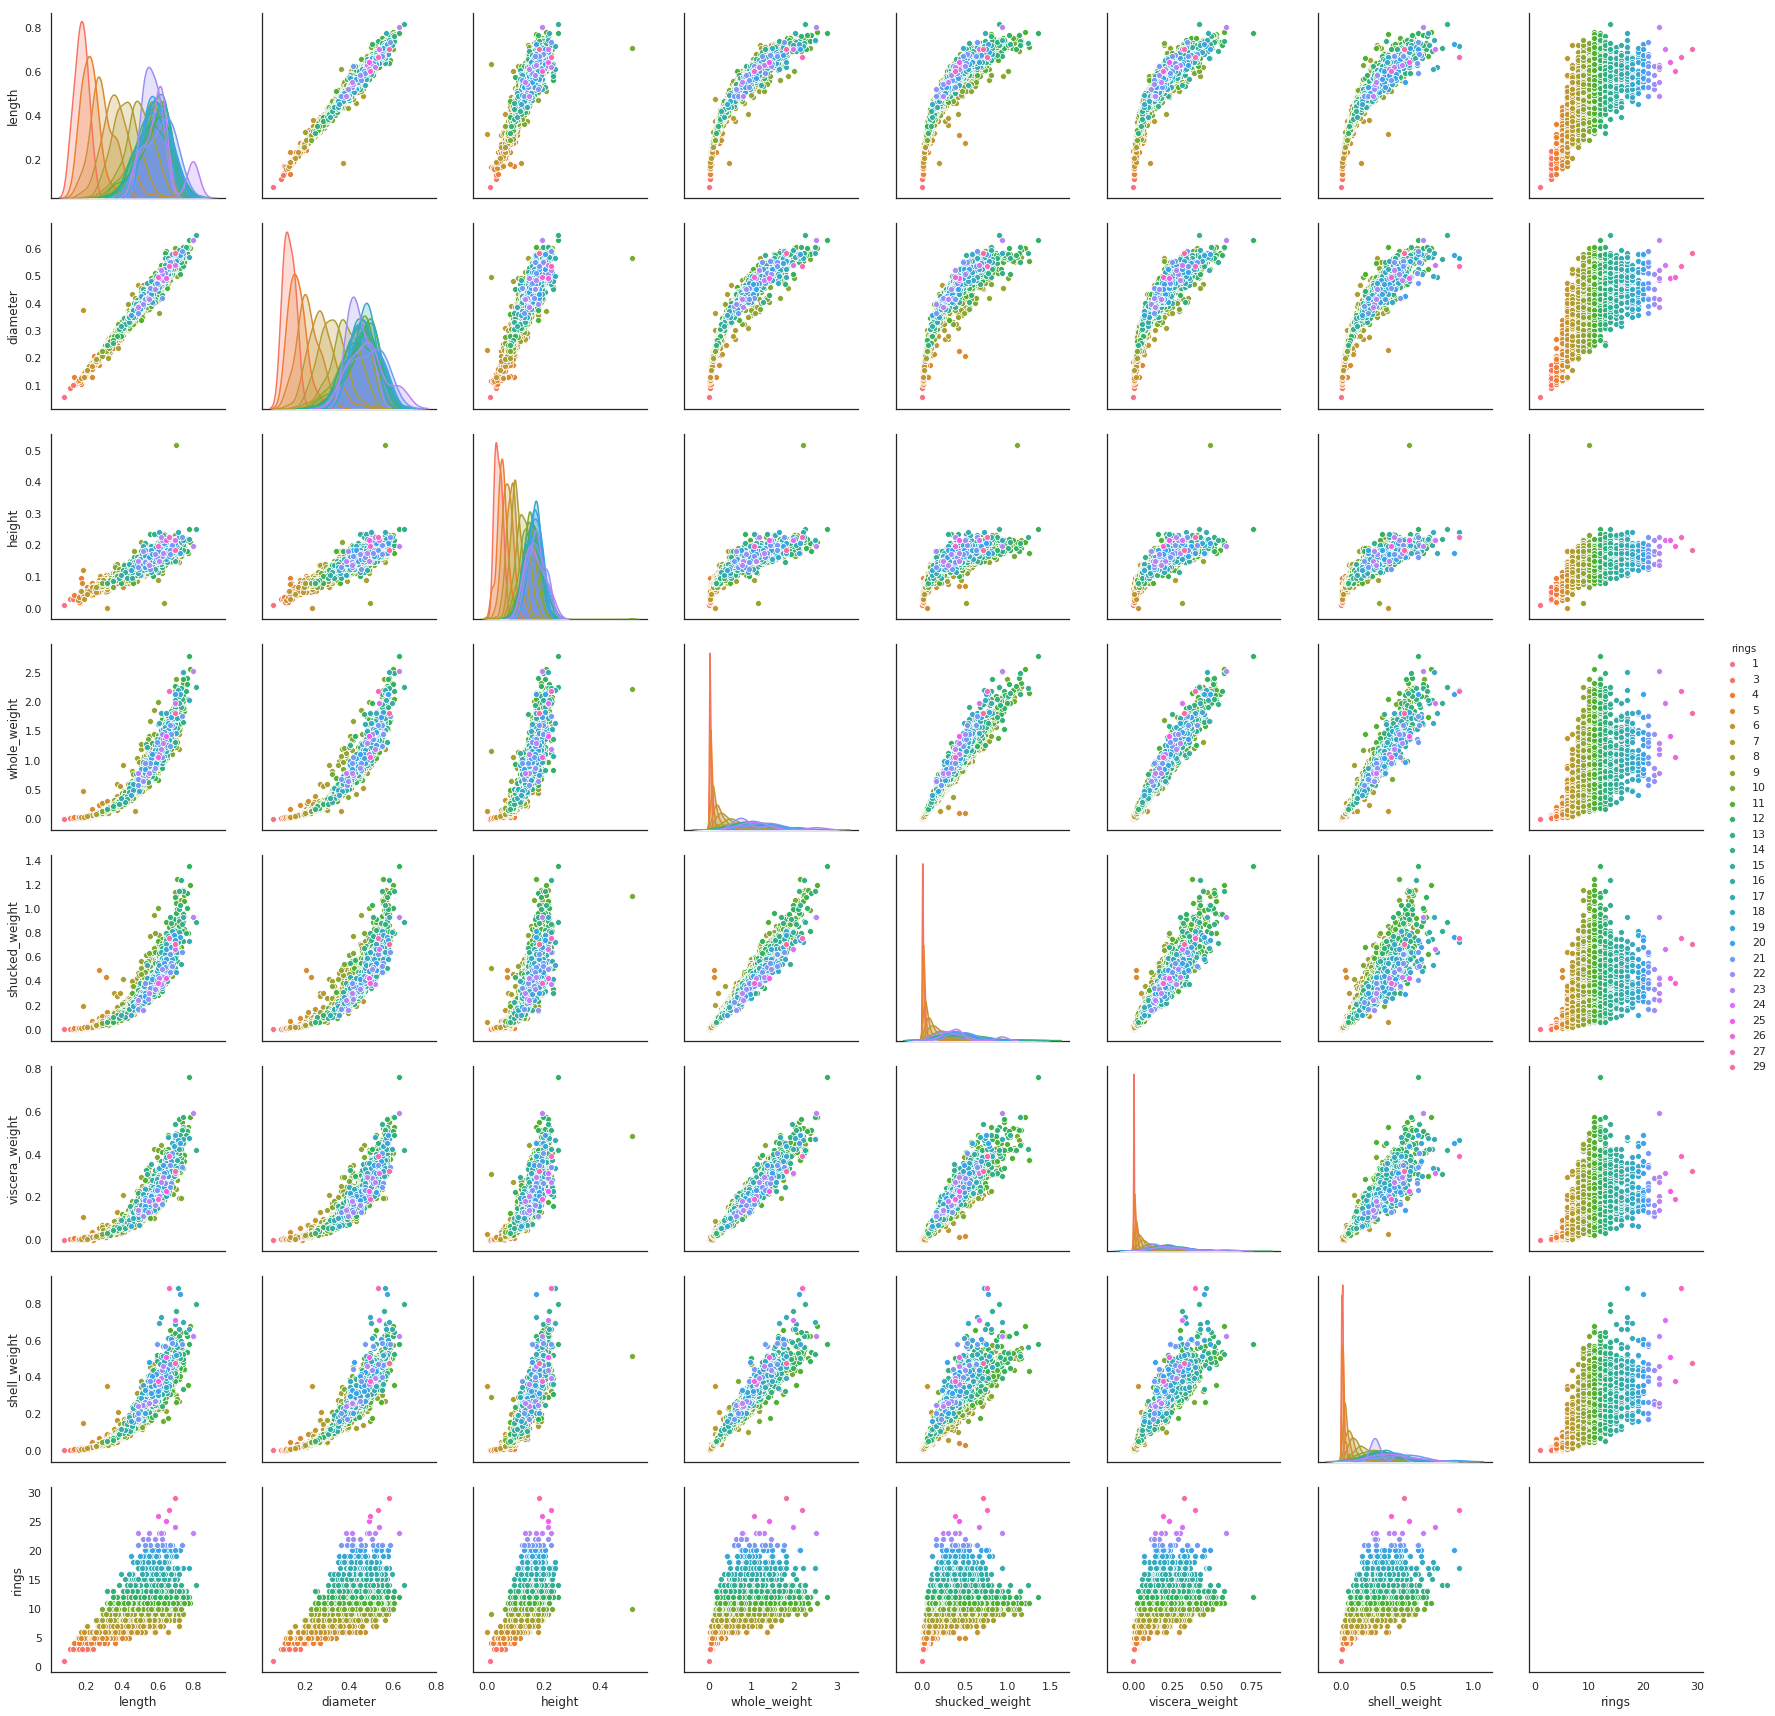

In [13]:
# gerar gráfico em pares com kde nas diagonais
sns.pairplot(data, hue="rings", size=3, diag_kind="kde")

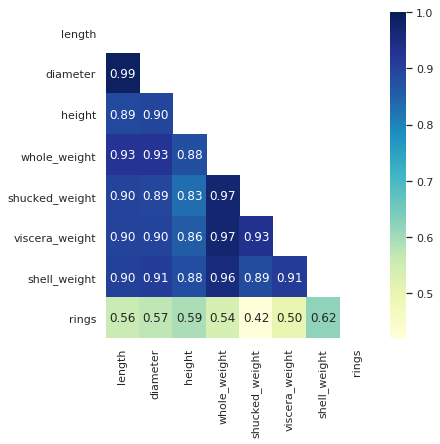

In [27]:
# gerar mapa de calor com a correlação das características
plt.figure(figsize=(6,6))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap="YlGnBu")

In [15]:
data.columns.values

array(['sex', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'],
      dtype=object)

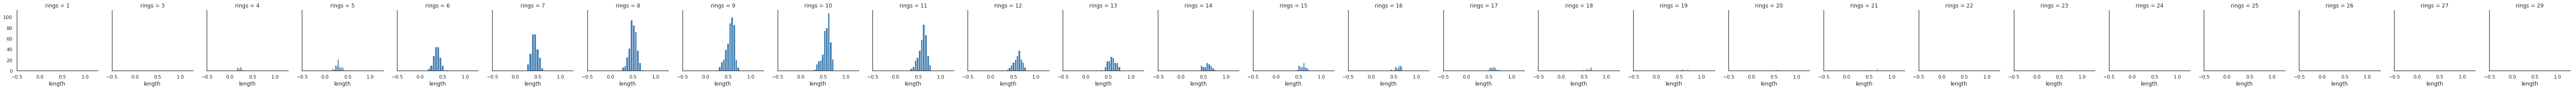

In [16]:
g = sns.FacetGrid(data, col="rings", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "length", color="steelblue") #, bins=bins)

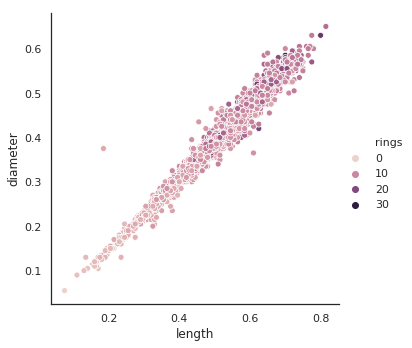

In [17]:
sns.relplot(x="length", y="diameter", hue="rings", data=data)

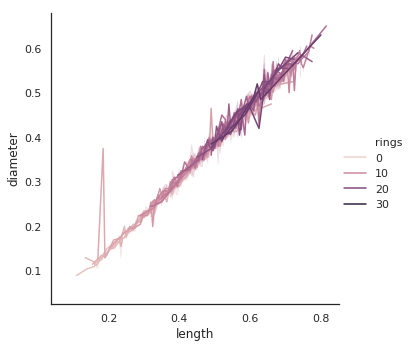

In [18]:
sns.relplot(x="length", y="diameter", hue="rings", kind="line", data=data)